In [1]:
import xarray as xr
from dask_jobqueue import SLURMCluster
from dask.distributed import Client

# Spin up a little cluster with `dask-jobqueue`

### Specs for an individual worker

In [2]:
cluster = SLURMCluster(walltime='00:20:00', cores=1, memory='4GB')

### Scale up to n workers

In [3]:
cluster.scale(jobs=4)

In [4]:
client = Client(cluster)
client

<Client: 'tcp://146.118.38.70:46277' processes=0 threads=0, memory=0 B>

# Do something with the cluster

In [6]:
example_file = '/group/pawsey0315/dsquire/work/data/test/csiro-dcfp-jra55/surface_month.zarr'
test = xr.open_zarr(example_file, consolidated=True)

In [7]:
# Get the monthly anomalies of temperature
anom = test['TMP_GDS0_HTGL'].groupby(
    'initial_time0_hours.month').apply(
    lambda x: x - x.mean('initial_time0_hours'))

/group/pawsey0315/dsquire/miniconda3/envs/pangeo/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/group/pawsey0315/dsquire/miniconda3/envs/pangeo/lib/python3.8/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 62 times more chunks
  return self.array[key]


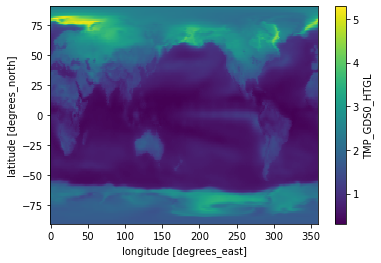

In [8]:
# Plot the standard deviation of the anomalies
anom.std('initial_time0_hours').plot()

In [14]:
cluster.close()
client.close()